In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load Dataset
df = pd.read_csv("./data/merged/processed_urls.csv")

# Invert label_mapping (map numbers to labels)
label_mapping = {0: 'benign', 1: 'defacement', 2: 'malware', 3: 'phishing', 4: 'spam'}

# Replace type column values with their mapped labels
df["type"] = df["type"].map(label_mapping)

# 1️⃣ Descriptive Statistics
print("📌 Descriptive Statistics:")
print(df.describe())

📌 Descriptive Statistics:
            url_len    domain_len      path_len  domain_entropy  \
count  59605.000000  59605.000000  59605.000000    59605.000000   
mean      72.747303     10.021106     43.446976        0.312445   
std       85.721775      4.929211     85.932000        0.106067   
min        7.000000      1.000000      0.000000        0.000000   
25%       34.000000      6.000000      0.000000        0.224060   
50%       52.000000      9.000000     21.000000        0.298747   
75%       86.000000     13.000000     57.000000        0.375272   
max     1424.000000    151.000000   1401.000000        0.528321   

       suffix_entropy  continuity_rate  symbol_count   token_count  \
count    59605.000000     59605.000000  59605.000000  59605.000000   
mean         0.449432         0.898304      9.258317      1.389900   
std          0.154918         0.225256      5.862602      0.927934   
min          0.000000         0.116667      0.000000      1.000000   
25%          0.46438

##### ^ Nothing Noteworthy

C:\Users\sarim\AppData\Local\Temp\ipykernel_100976\1136121209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["type"], palette="viridis")


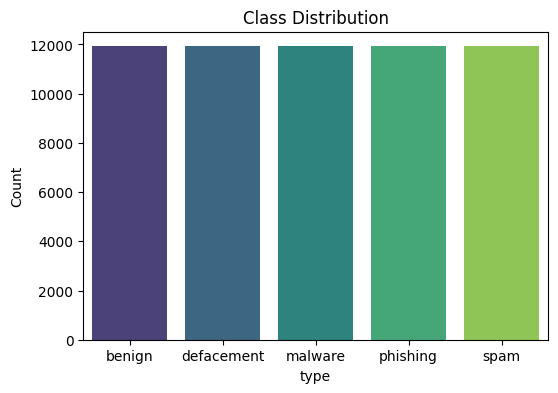

In [16]:
# 2️⃣ Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["type"], palette="viridis")
plt.title("Class Distribution")
plt.ylabel("Count")
plt.show()

##### ^ Evenly Distributed Classes after undersampling

C:\Users\sarim\AppData\Local\Temp\ipykernel_100976\668246110.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="type", y="url_len", data=df, palette="Set2")


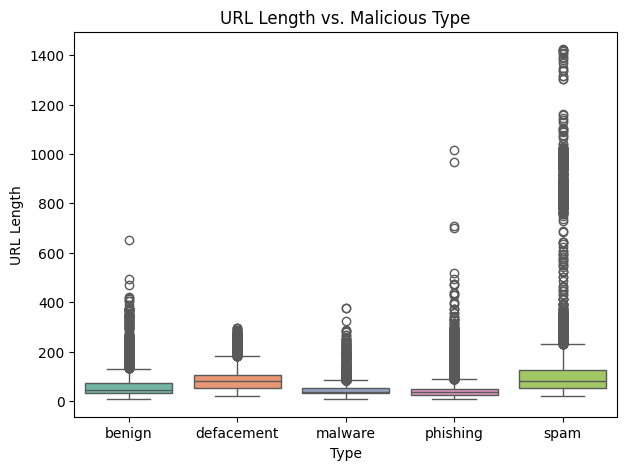

In [17]:

# 3️⃣ URL Length vs. Malicious Type (Box Plot)
plt.figure(figsize=(7, 5))
sns.boxplot(x="type", y="url_len", data=df, palette="Set2")
plt.title("URL Length vs. Malicious Type")
plt.xlabel("Type")
plt.ylabel("URL Length")
plt.show()


##### ^ Spam class has a lot more outliers than ususal

C:\Users\sarim\AppData\Local\Temp\ipykernel_100976\1244271821.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="type", y="domain_entropy", data=df, palette="coolwarm")


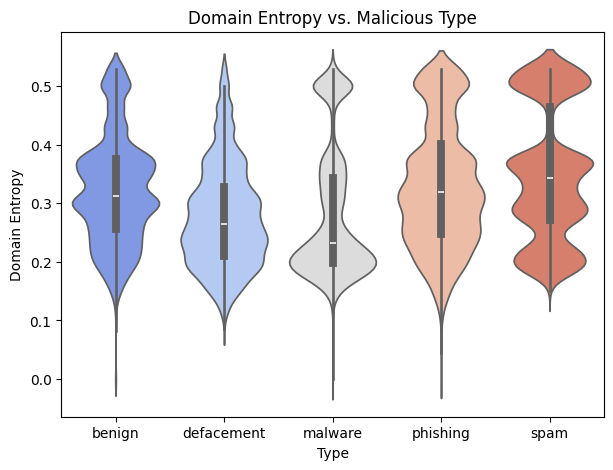

In [18]:

# 4️⃣ Domain Entropy vs. Malicious Type (Violin Plot)
plt.figure(figsize=(7, 5))
sns.violinplot(x="type", y="domain_entropy", data=df, palette="coolwarm")
plt.title("Domain Entropy vs. Malicious Type")
plt.xlabel("Type")
plt.ylabel("Domain Entropy")
plt.show()



##### ^ Unique Entropy Patterns on Classes Malware, Phishing & Spam

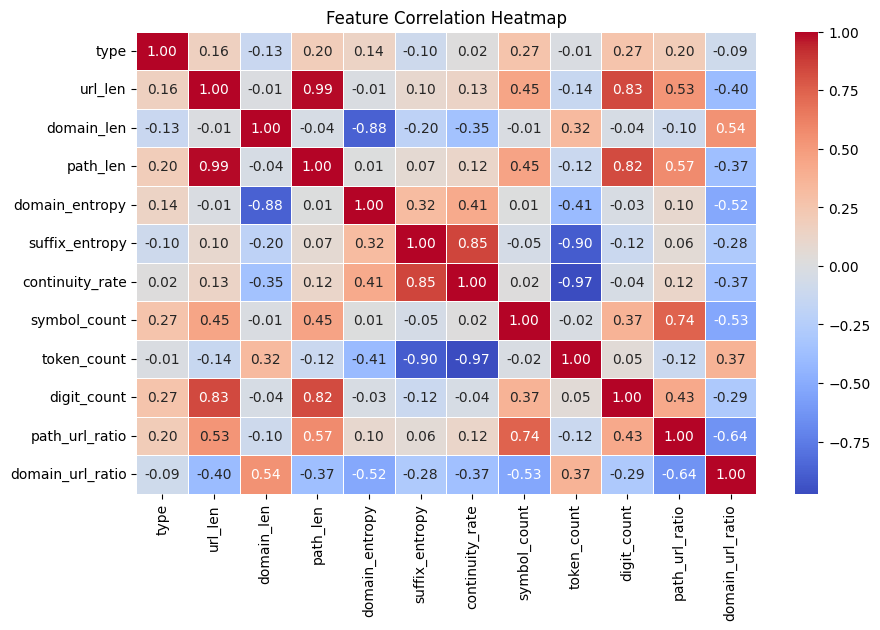

In [6]:
# Drop the 'url' column before computing correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=["url"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

##### ^ Symbol Count, Digit Count, Path URL ratio, Path Length heavily related to type....interesting

C:\Users\sarim\AppData\Local\Temp\ipykernel_100976\2067092507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["type"], y=df["url_len"], palette="muted")


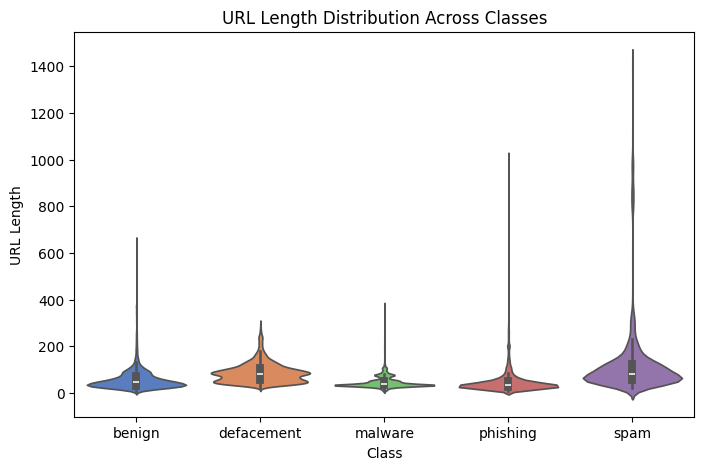

In [19]:
# 7️⃣ URL Length vs. Malicious Type (Violin Plot)

plt.figure(figsize=(8, 5))
sns.violinplot(x=df["type"], y=df["url_len"], palette="muted")
plt.title("URL Length Distribution Across Classes")
plt.xlabel("Class")
plt.ylabel("URL Length")
plt.show()


##### ^ Spam again having the longest URL length

C:\Users\sarim\AppData\Local\Temp\ipykernel_100976\1007467411.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tlds.index, y=top_tlds.values, palette="coolwarm")


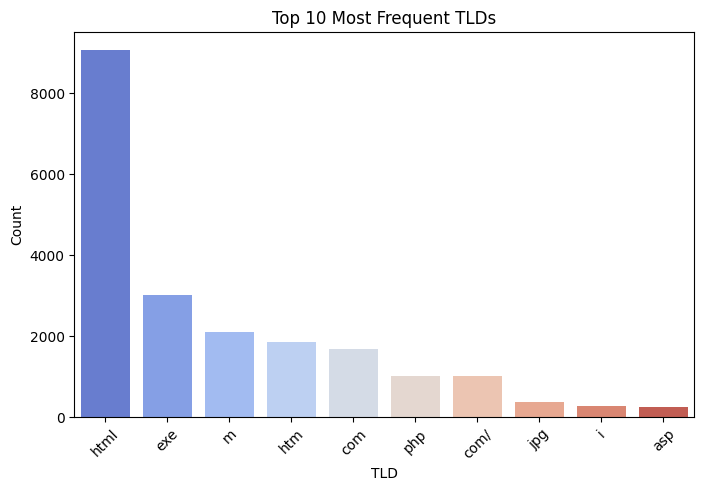

In [9]:
# 8️⃣ Top 10 Most Frequent TLDs (Bar Chart)

df["tld"] = df["url"].apply(lambda x: x.split(".")[-1])  # Extract TLD
top_tlds = df["tld"].value_counts().nlargest(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_tlds.index, y=top_tlds.values, palette="coolwarm")
plt.title("Top 10 Most Frequent TLDs")
plt.xlabel("TLD")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


#### ^ exe & m are an interesting TLD choice

C:\Users\sarim\AppData\Local\Temp\ipykernel_100976\2084170684.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["type"], y=df["symbol_count"], palette="Set2")


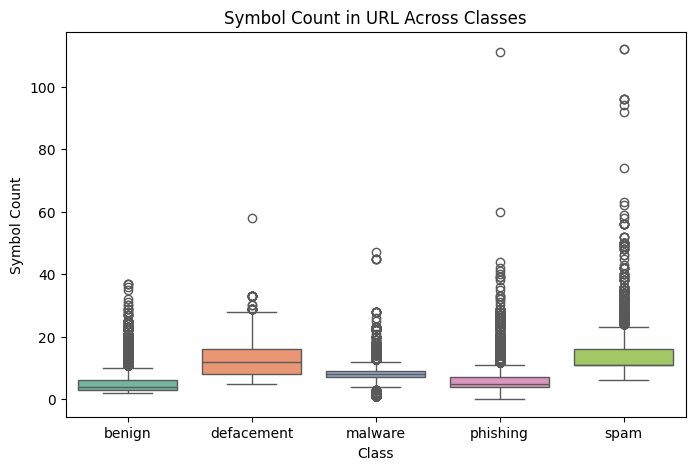

In [20]:
# 9️⃣ Symbol Count vs. Malicious Type (Box Plot)

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["type"], y=df["symbol_count"], palette="Set2")
plt.title("Symbol Count in URL Across Classes")
plt.xlabel("Class")
plt.ylabel("Symbol Count")
plt.show()


#### ^ higher symbol count in defacement and spam links

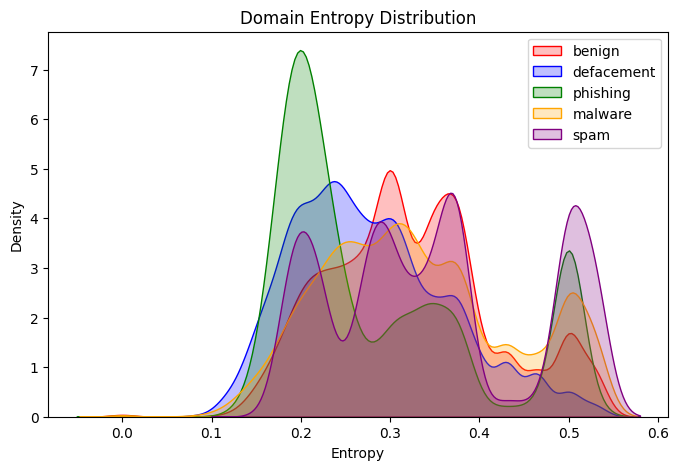

In [ ]:
# 🔟 Entropy Distribution for Domains

plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["type"] == 0]["domain_entropy"], label="benign", fill=True, color="red")
sns.kdeplot(df[df["type"] == 1]["domain_entropy"], label="defacement", fill=True, color="blue")
sns.kdeplot(df[df["type"] == 2]["domain_entropy"], label="phishing", fill=True, color="green")
sns.kdeplot(df[df["type"] == 3]["domain_entropy"], label="malware", fill=True, color="orange")
sns.kdeplot(df[df["type"] == 4]["domain_entropy"], label="spam", fill=True, color="purple")
plt.title("Domain Entropy Distribution")
plt.xlabel("Entropy")
plt.ylabel("Density")
plt.legend()
plt.show()


#### ^ phishing has a spikier domain entropy distribution